# ECE C247 - Neural Networks & Deep Learning
# EEG Dataset

# Group Members
### Anirudh Krishna 
### Swagath Babu 
### Jacob Thomas

# Load the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Defining the Parameters

In [3]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

### We tried different values for the Learning Rate and for the Decay. However, the values defined below are considered the best in order to obtain good performance. 

## Load Data

In [4]:
data_path = "/content/drive/My Drive/Dataset/C247/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[9], verbose=True)

Training/Valid data shape: (231, 22, 1000)
Test data shape: (47, 22, 1000)


In [5]:
X_train_valid

array([[[ 10.30273438,  16.11328125,  11.86523438, ...,  34.5703125 ,
          27.34375   ,  23.6328125 ],
        [ 15.67382812,  15.57617188,  14.55078125, ...,  33.44726562,
          28.515625  ,  25.92773438],
        [ 19.09179688,  20.8984375 ,  15.33203125, ...,  33.10546875,
          26.12304688,  24.16992188],
        ...,
        [ 19.77539062,  23.046875  ,  16.89453125, ...,  20.75195312,
          19.28710938,  20.01953125],
        [ 23.53515625,  27.63671875,  23.828125  , ...,  23.19335938,
          18.89648438,  17.91992188],
        [ 16.25976562,  20.94726562,  16.50390625, ...,  14.55078125,
          14.2578125 ,  15.08789062]],

       [[  1.953125  ,   4.83398438,  -0.83007812, ...,  -7.91015625,
          -6.68945312,  -4.44335938],
        [-11.71875   ,  -7.12890625,  -4.78515625, ...,  -0.09765625,
          -2.39257812,  -4.15039062],
        [ -3.66210938,   2.58789062,  -1.171875  , ...,  -2.49023438,
          -1.7578125 ,  -3.36914062],
        ...,


In [6]:
y_train_valid

array([3., 1., 3., 2., 1., 1., 0., 0., 2., 2., 1., 1., 3., 0., 3., 3., 3.,
       2., 0., 3., 0., 2., 0., 2., 1., 2., 1., 2., 1., 1., 3., 3., 0., 0.,
       0., 1., 0., 3., 1., 0., 0., 3., 3., 3., 3., 2., 2., 0., 0., 2., 0.,
       0., 1., 2., 3., 0., 2., 0., 1., 2., 0., 3., 3., 1., 1., 0., 3., 3.,
       1., 3., 2., 2., 2., 2., 2., 1., 0., 3., 2., 1., 3., 0., 2., 3., 1.,
       2., 1., 3., 1., 1., 2., 0., 3., 1., 3., 1., 1., 1., 2., 1., 2., 2.,
       3., 2., 1., 0., 3., 3., 0., 3., 3., 0., 0., 3., 0., 2., 3., 0., 3.,
       2., 2., 1., 0., 3., 1., 3., 3., 3., 2., 0., 0., 0., 1., 1., 1., 2.,
       0., 2., 1., 2., 0., 1., 1., 3., 2., 3., 1., 3., 3., 3., 2., 1., 1.,
       0., 2., 2., 3., 2., 3., 1., 0., 3., 2., 3., 0., 1., 3., 0., 1., 1.,
       1., 2., 3., 2., 1., 1., 0., 2., 0., 2., 1., 3., 1., 2., 2., 2., 0.,
       0., 3., 2., 0., 3., 1., 3., 2., 1., 1., 1., 1., 2., 0., 0., 1., 3.,
       2., 1., 0., 1., 3., 2., 0., 0., 0., 3., 2., 0., 2., 0., 0., 1., 0.,
       1., 0., 2., 0., 2.

In [7]:
X_test

array([[[  2.24609375,  -2.44140625,  -4.6875    , ..., -13.81835938,
          -1.22070312,   1.46484375],
        [  4.296875  ,   2.05078125,  -8.0078125 , ..., -11.96289062,
          -6.49414062,  -1.26953125],
        [ -2.5390625 ,  -5.81054688, -11.57226562, ..., -16.06445312,
          -4.63867188,  -0.48828125],
        ...,
        [-47.55859375, -48.92578125, -51.953125  , ...,   5.2734375 ,
           9.5703125 ,   7.6171875 ],
        [-41.9921875 , -41.84570312, -42.82226562, ...,   7.17773438,
          13.23242188,  11.03515625],
        [-49.26757812, -47.99804688, -48.828125  , ...,  10.49804688,
          15.13671875,  12.59765625]],

       [[ -1.3671875 ,  -0.92773438,  -5.078125  , ..., -15.91796875,
         -20.45898438, -13.52539062],
        [ -4.39453125,  -5.90820312,  -4.34570312, ...,  -7.37304688,
          -9.13085938,  -2.88085938],
        [ -8.30078125,  -6.34765625,  -6.640625  , ..., -11.57226562,
         -15.18554688,  -8.44726562],
        ...,


In [8]:
y_test

array([0., 2., 0., 3., 1., 2., 2., 0., 2., 0., 2., 0., 3., 3., 3., 2., 3.,
       2., 0., 1., 0., 2., 1., 2., 3., 3., 1., 1., 3., 0., 1., 1., 2., 0.,
       2., 1., 3., 1., 0., 1., 0., 0., 1., 0., 3., 2., 1.])

## Preprocessing

In [9]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Loading

In [10]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Comparing different models for Subject 9 and giving a comparative perspective

### The model architecture can found in the models.py file

## CNN

In [11]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.51097
	Train loss: 0.04662, Accuracy: 48/184 (26.09%)
	Validation loss: 0.03134, Accuracy: 10/47 (21.28%)
	Test loss: 0.03072, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.52968
	Train loss: 0.04788, Accuracy: 48/184 (26.09%)
	Validation loss: 0.03227, Accuracy: 10/47 (21.28%)
	Test loss: 0.03146, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.38374
	Train loss: 0.04757, Accuracy: 48/184 (26.09%)
	Validation loss: 0.03230, Accuracy: 10/47 (21.28%)
	Test loss: 0.03105, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.40301
	Train loss: 0.04652, Accuracy: 48/184 (26.09%)
	Validation loss: 0.03189, Accuracy: 10/47 (21.28%)
	Test loss: 0.03065, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.38115
	Train loss: 0.04693, Accuracy: 53/184 (28.80%)
	Validation loss: 0.03197, Accuracy: 10/47 (21.28%)
	Test loss: 0.030

Best validation accuracy:
0.3830

Best test accuracy:
0.4255

## Plotting Metrics v/s Number of Epochs: 
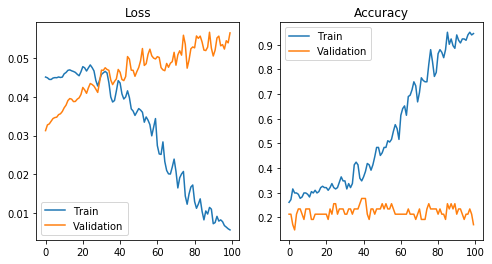

## LSTM

In [12]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.42922
	Train loss: 0.04600, Accuracy: 43/184 (23.37%)
	Validation loss: 0.02956, Accuracy: 13/47 (27.66%)
	Test loss: 0.02951, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.32558
	Train loss: 0.04624, Accuracy: 43/184 (23.37%)
	Validation loss: 0.02970, Accuracy: 13/47 (27.66%)
	Test loss: 0.02961, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.32489
	Train loss: 0.04591, Accuracy: 43/184 (23.37%)
	Validation loss: 0.02969, Accuracy: 13/47 (27.66%)
	Test loss: 0.02961, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.39091
	Train loss: 0.04497, Accuracy: 46/184 (25.00%)
	Validation loss: 0.02969, Accuracy: 14/47 (29.79%)
	Test loss: 0.02956, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.31203
	Train loss: 0.04340, Accuracy: 65/184 (35.33%)
	Validation loss: 0.03003, Accuracy: 13/47 (27.66%)
	Test loss: 0.029

Best validation accuracy:
0.4468

Best test accuracy:
0.3404

## Plotting Metrics v/s Number of Epochs: 
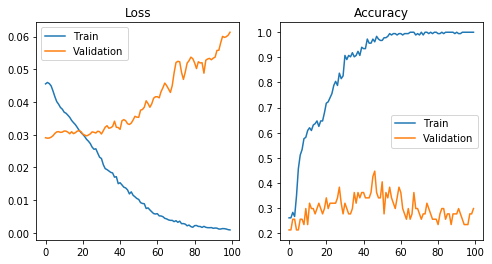

## CNN + LSTM

In [13]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.39352
	Train loss: 0.04523, Accuracy: 48/184 (26.09%)
	Validation loss: 0.02955, Accuracy: 10/47 (21.28%)
	Test loss: 0.02947, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.39000
	Train loss: 0.04519, Accuracy: 48/184 (26.09%)
	Validation loss: 0.02953, Accuracy: 10/47 (21.28%)
	Test loss: 0.02945, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.38827
	Train loss: 0.04499, Accuracy: 48/184 (26.09%)
	Validation loss: 0.02940, Accuracy: 10/47 (21.28%)
	Test loss: 0.02933, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.37734
	Train loss: 0.04455, Accuracy: 49/184 (26.63%)
	Validation loss: 0.02913, Accuracy: 11/47 (23.40%)
	Test loss: 0.02910, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.36348
	Train loss: 0.04412, Accuracy: 77/184 (41.85%)
	Validation loss: 0.02885, Accuracy: 16/47 (34.04%)
	Test loss: 0.028

Best validation accuracy:
0.6170

Best test accuracy:
0.6383

## Plotting Metrics v/s Number of Epochs: 
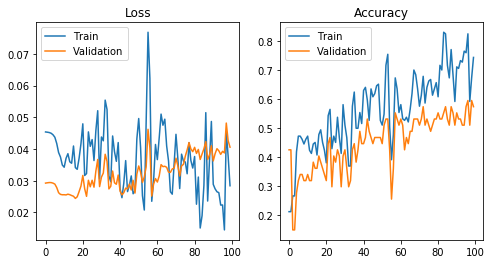

## GRU

In [14]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.53074
	Train loss: 0.04528, Accuracy: 40/184 (21.74%)
	Validation loss: 0.02944, Accuracy: 12/47 (25.53%)
	Test loss: 0.02950, Accuracy: 10/47 (21.28%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.36183
	Train loss: 0.04508, Accuracy: 50/184 (27.17%)
	Validation loss: 0.02953, Accuracy: 13/47 (27.66%)
	Test loss: 0.02958, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.38367
	Train loss: 0.04405, Accuracy: 60/184 (32.61%)
	Validation loss: 0.02975, Accuracy: 13/47 (27.66%)
	Test loss: 0.02952, Accuracy: 13/47 (27.66%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.38996
	Train loss: 0.04293, Accuracy: 68/184 (36.96%)
	Validation loss: 0.02991, Accuracy: 11/47 (23.40%)
	Test loss: 0.02967, Accuracy: 14/47 (29.79%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.30340
	Train loss: 0.04201, Accuracy: 75/184 (40.76%)
	Validation loss: 0.03001, Accuracy: 13/47 (27.66%)
	Test loss: 0.029

Best validation accuracy:
0.4137

Best test accuracy:
0.3617

## Plotting Metrics v/s Number of Epochs:
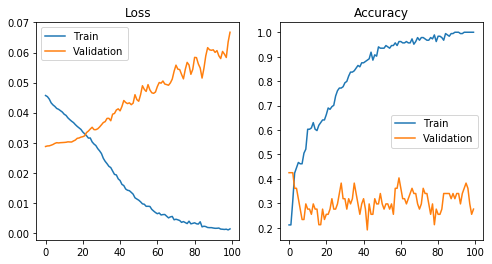

## CNN + GRU

In [15]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/184 (0.00%)]		Loss: 1.38600
	Train loss: 0.04518, Accuracy: 46/184 (25.00%)
	Validation loss: 0.02947, Accuracy: 13/47 (27.66%)
	Test loss: 0.02948, Accuracy: 12/47 (25.53%)

Training Progress: 	Epoch 2 [0/184 (0.00%)]		Loss: 1.37414
	Train loss: 0.04472, Accuracy: 71/184 (38.59%)
	Validation loss: 0.02914, Accuracy: 15/47 (31.91%)
	Test loss: 0.02921, Accuracy: 17/47 (36.17%)

Training Progress: 	Epoch 3 [0/184 (0.00%)]		Loss: 1.36194
	Train loss: 0.04254, Accuracy: 98/184 (53.26%)
	Validation loss: 0.02784, Accuracy: 22/47 (46.81%)
	Test loss: 0.02810, Accuracy: 19/47 (40.43%)

Training Progress: 	Epoch 4 [0/184 (0.00%)]		Loss: 1.28321
	Train loss: 0.03954, Accuracy: 93/184 (50.54%)
	Validation loss: 0.02605, Accuracy: 22/47 (46.81%)
	Test loss: 0.02660, Accuracy: 23/47 (48.94%)

Training Progress: 	Epoch 5 [0/184 (0.00%)]		Loss: 1.18375
	Train loss: 0.03977, Accuracy: 80/184 (43.48%)
	Validation loss: 0.02557, Accuracy: 20/47 (42.55%)
	Test loss: 0.026

Best validation accuracy:
0.5857

Best test accuracy:
0.6595

## Plotting Metrics v/s Number of Epochs: 
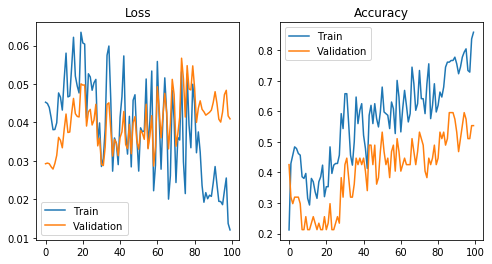